[* 데이터 다운로드 ](https://www.kaggle.com/datasets/kkhandekar/stolen-vehicle-dataset?resource=download&select=stolenvehicles.csv)

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm

from datetime import datetime 
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import LabelEncoder

# 한글 깨짐
plt.rc('font', family='NanumBarunGothic') 
plt.rcParams['figure.figsize'] = 15,8
plt.figure(figsize=(4,4))

In [84]:
df = pd.read_csv('/content/drive/MyDrive/data/stolenvehicles.csv')
df.head()

,Color,VehicleModel,VehicleDesc,ModelYear,VehicleType,DateStolen,Location
0,Silver,Trailer,BST2021D,2021,Trailer,5/11/2021,Waitemata
1,Silver,Trailer,OUTBACK BOATS FT470,2021,Boat Trailer,13/12/2021,Eastern
2,Silver,Trailer,ASD JETSKI,2021,Boat Trailer,13/02/2022,Auckland City
3,Silver,Trailer,MSC 7X4,2021,Trailer,13/11/2021,Central
4,Silver,Trailer,D-MAX 8X5,2018,Trailer,10/01/2022,Waitemata


In [85]:
df.isnull().sum()

Color           17
VehicleModel    15
VehicleDesc     35
ModelYear        0
VehicleType     26
DateStolen       0
Location         0
dtype: int64

In [86]:
df['DateStolen']  = df['DateStolen'].map(lambda x : datetime.strptime(x, '%d/%m/%Y').strftime('%Y-%m-%d'))
df['Stolen_ym']  = df['DateStolen'].map(lambda x : datetime.strptime(x, '%Y-%m-%d').strftime('%Y-%m'))
df.head()

,Color,VehicleModel,VehicleDesc,ModelYear,VehicleType,DateStolen,Location,Stolen_ym
0,Silver,Trailer,BST2021D,2021,Trailer,2021-11-05,Waitemata,2021-11
1,Silver,Trailer,OUTBACK BOATS FT470,2021,Boat Trailer,2021-12-13,Eastern,2021-12
2,Silver,Trailer,ASD JETSKI,2021,Boat Trailer,2022-02-13,Auckland City,2022-02
3,Silver,Trailer,MSC 7X4,2021,Trailer,2021-11-13,Central,2021-11
4,Silver,Trailer,D-MAX 8X5,2018,Trailer,2022-01-10,Waitemata,2022-01


In [90]:
def value_count(col):
  print(col)
  print(df[col].value_counts())
  print('===========================\n')

In [91]:
for i in list(df.columns):
  value_count(i)

Color
Silver    1272
White      934
Black      588
Blue       512
Red        389
Grey       378
Green      224
Gold        77
Brown       49
Yellow      39
Orange      35
Purple      26
Cream        9
Pink         4
Name: Color, dtype: int64

VehicleModel
Toyota           716
Trailer          543
Nissan           482
Mazda            433
Ford             312
                ... 
Toyota Lexus       1
Daewoo             1
Caterpillar        1
Morris             1
Nissan Diesel      1
Name: VehicleModel, Length: 138, dtype: int64

VehicleDesc
HILUX             137
COURIER           133
DEMIO              94
LEGACY             88
ATENZA             79
                 ... 
FOXENG 1000         1
GSX650F             1
P.S.                1
COMPASS-FPT104      1
TTR125              1
Name: VehicleDesc, Length: 1178, dtype: int64

ModelYear
2005    346
2006    333
2007    251
2004    238
2008    190
       ... 
1962      1
1943      1
1957      1
1940      1
1965      1
Name: ModelYear, Length

In [92]:
df.head(3)

,Color,VehicleModel,VehicleDesc,ModelYear,VehicleType,DateStolen,Location,Stolen_ym
0,Silver,Trailer,BST2021D,2021,Trailer,2021-11-05,Waitemata,2021-11
1,Silver,Trailer,OUTBACK BOATS FT470,2021,Boat Trailer,2021-12-13,Eastern,2021-12
2,Silver,Trailer,ASD JETSKI,2021,Boat Trailer,2022-02-13,Auckland City,2022-02


In [93]:
df['ModelYear'].describe()

count    4553.000000
mean     1996.420163
std       132.935607
min         0.000000
25%      2000.000000
50%      2005.000000
75%      2011.000000
max      2022.000000
Name: ModelYear, dtype: float64

In [94]:
df['ModelYear_type'] = ''

df.loc[df['ModelYear'] == 0, 'ModelYear_type'] = '데이터 없음'
df.loc[(df['ModelYear'] < 2000) & (df['ModelYear_type'] == ''), 'ModelYear_type'] = 'a. 2000년 이전'
df.loc[(df['ModelYear'] >= 2000) & (df['ModelYear'] < 2005) & (df['ModelYear_type'] == ''), 'ModelYear_type'] = 'b. 2000년~2004년'
df.loc[(df['ModelYear'] >= 2005) & (df['ModelYear'] < 2010) & (df['ModelYear_type'] == ''), 'ModelYear_type'] = 'c. 2005년~2010년'
df.loc[(df['ModelYear'] >= 2010) & (df['ModelYear'] < 2015) & (df['ModelYear_type'] == ''), 'ModelYear_type'] = 'd. 2010년~2014년'
df.loc[(df['ModelYear'] >= 2015) & (df['ModelYear'] < 2020) & (df['ModelYear_type'] == ''), 'ModelYear_type'] = 'e. 2015년~2019년'
df.loc[(df['ModelYear'] >= 2020) & (df['ModelYear'] < 2023) & (df['ModelYear_type'] == ''), 'ModelYear_type'] = 'f. 2020년~2022년'

df.head()

,Color,VehicleModel,VehicleDesc,ModelYear,VehicleType,DateStolen,Location,Stolen_ym,ModelYear_type
0,Silver,Trailer,BST2021D,2021,Trailer,2021-11-05,Waitemata,2021-11,f. 2020년~2022년
1,Silver,Trailer,OUTBACK BOATS FT470,2021,Boat Trailer,2021-12-13,Eastern,2021-12,f. 2020년~2022년
2,Silver,Trailer,ASD JETSKI,2021,Boat Trailer,2022-02-13,Auckland City,2022-02,f. 2020년~2022년
3,Silver,Trailer,MSC 7X4,2021,Trailer,2021-11-13,Central,2021-11,f. 2020년~2022년
4,Silver,Trailer,D-MAX 8X5,2018,Trailer,2022-01-10,Waitemata,2022-01,e. 2015년~2019년


In [95]:
df['cnt'] = 1 
df.head()

,Color,VehicleModel,VehicleDesc,ModelYear,VehicleType,DateStolen,Location,Stolen_ym,ModelYear_type,cnt
0,Silver,Trailer,BST2021D,2021,Trailer,2021-11-05,Waitemata,2021-11,f. 2020년~2022년,1
1,Silver,Trailer,OUTBACK BOATS FT470,2021,Boat Trailer,2021-12-13,Eastern,2021-12,f. 2020년~2022년,1
2,Silver,Trailer,ASD JETSKI,2021,Boat Trailer,2022-02-13,Auckland City,2022-02,f. 2020년~2022년,1
3,Silver,Trailer,MSC 7X4,2021,Trailer,2021-11-13,Central,2021-11,f. 2020년~2022년,1
4,Silver,Trailer,D-MAX 8X5,2018,Trailer,2022-01-10,Waitemata,2022-01,e. 2015년~2019년,1


In [96]:
stolen_model_df = df.pivot_table(columns='ModelYear_type', index='Stolen_ym', values='cnt', aggfunc='mean')
stolen_model_df

ModelYear_type,a. 2000년 이전,b. 2000년~2004년,c. 2005년~2010년,d. 2010년~2014년,e. 2015년~2019년,f. 2020년~2022년,데이터 없음
Stolen_ym,,,,,,,
2021-10,1,1,1,1,1,1,1
2021-11,1,1,1,1,1,1,1
2021-12,1,1,1,1,1,1,1
2022-01,1,1,1,1,1,1,1
2022-02,1,1,1,1,1,1,1
2022-03,1,1,1,1,1,1,1
2022-04,1,1,1,1,1,1,1


In [97]:
stolen_model_df = df.pivot_table(columns='ModelYear_type', index='Stolen_ym', values='cnt', aggfunc='sum')
stolen_model_df

ModelYear_type,a. 2000년 이전,b. 2000년~2004년,c. 2005년~2010년,d. 2010년~2014년,e. 2015년~2019년,f. 2020년~2022년,데이터 없음
Stolen_ym,,,,,,,
2021-10,128,94,109,44,56,30,3
2021-11,158,105,133,63,58,40,3
2021-12,156,146,157,71,73,39,2
2022-01,204,125,204,81,82,42,2
2022-02,168,150,214,91,86,49,5
2022-03,220,213,317,120,114,66,3
2022-04,64,56,111,47,34,15,2


Text(0, 0.5, 'cnt')

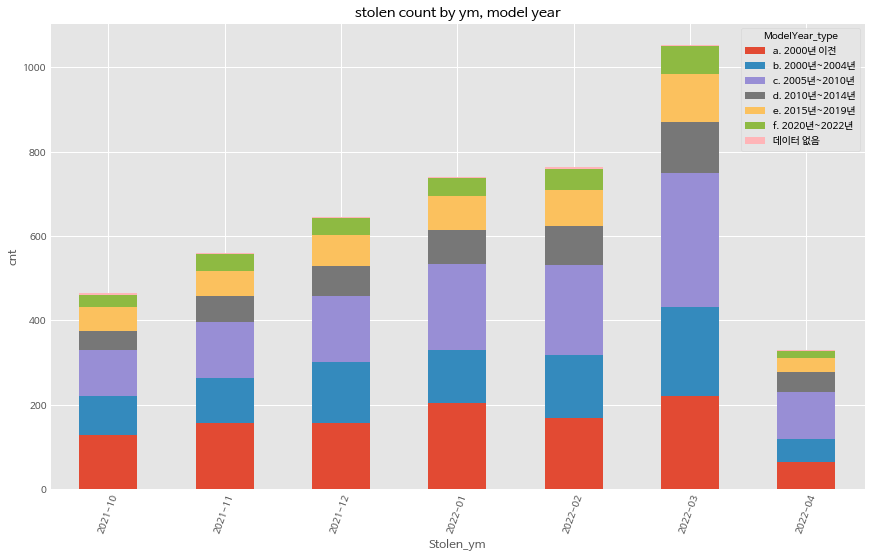

In [99]:
plt.style.use('ggplot')
ax = stolen_model_df.plot(kind='bar', rot=70, figsize=(13,8)
                       , title='stolen count by ym, model year', stacked=True)
ax.set_ylabel('cnt')

In [100]:
pip install matplotlib==3.4.1

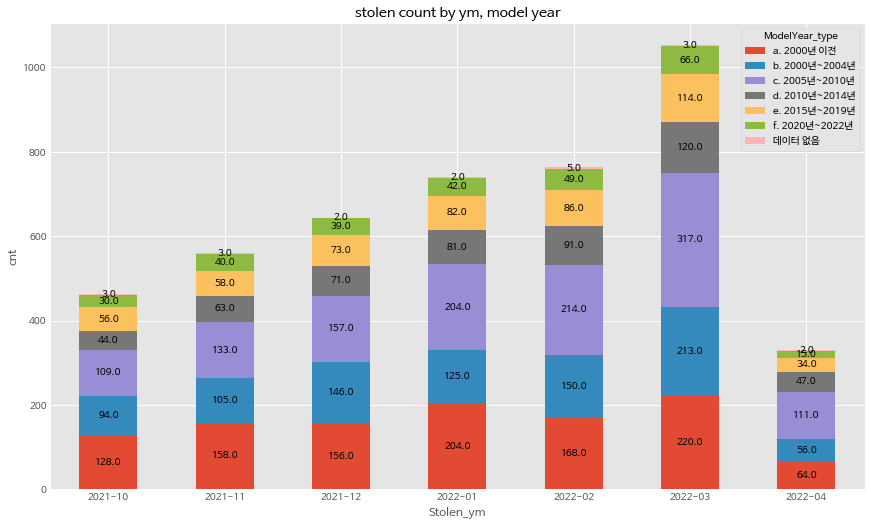

In [101]:
plt.style.use('ggplot')
ax = stolen_model_df.plot(kind='bar', rot=0, figsize=(13,8)
                       , title='stolen count by ym, model year', stacked=True)
ax.set_ylabel('cnt')

for c in ax.containers:
  labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
  ax.bar_label(c, labels=labels, label_type='center')

In [103]:
df['DateStolen'] = pd.to_datetime(df['DateStolen'])

In [106]:
df['DateStolen'] = pd.to_datetime(df['DateStolen'])
tmp_df = pd.DataFrame(df.groupby('DateStolen').cnt.sum())
result = sm.tsa.seasonal_decompose(tmp_df.cnt)

<AxesSubplot:xlabel='DateStolen'>

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


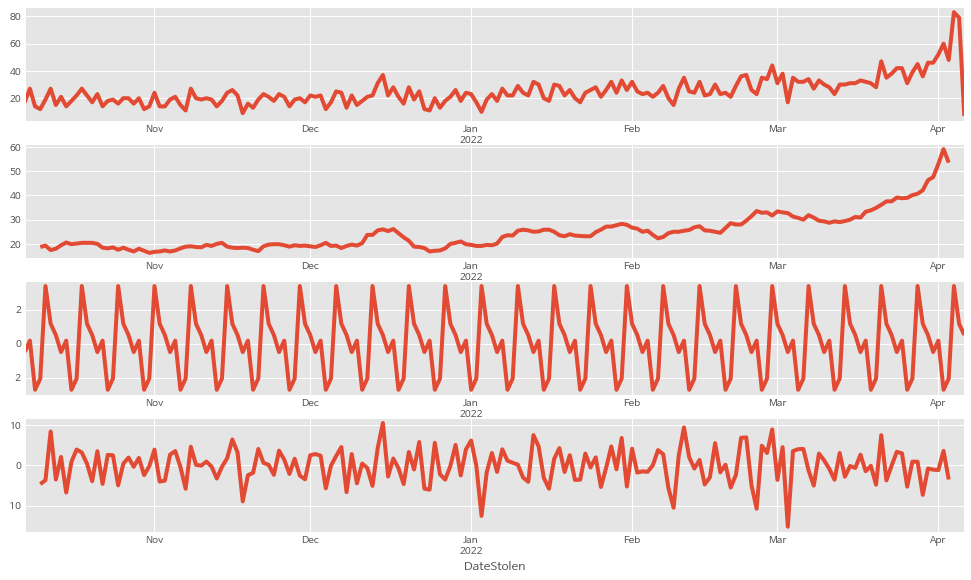

In [107]:
fig,(ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(15,9))
result.observed.plot(ax=ax1)
result.trend.plot(ax=ax2)
result.seasonal.plot(ax=ax3)
result.resid.plot(ax=ax4)

In [108]:
df.head()

,Color,VehicleModel,VehicleDesc,ModelYear,VehicleType,DateStolen,Location,Stolen_ym,ModelYear_type,cnt
0,Silver,Trailer,BST2021D,2021,Trailer,2021-11-05,Waitemata,2021-11,f. 2020년~2022년,1
1,Silver,Trailer,OUTBACK BOATS FT470,2021,Boat Trailer,2021-12-13,Eastern,2021-12,f. 2020년~2022년,1
2,Silver,Trailer,ASD JETSKI,2021,Boat Trailer,2022-02-13,Auckland City,2022-02,f. 2020년~2022년,1
3,Silver,Trailer,MSC 7X4,2021,Trailer,2021-11-13,Central,2021-11,f. 2020년~2022년,1
4,Silver,Trailer,D-MAX 8X5,2018,Trailer,2022-01-10,Waitemata,2022-01,e. 2015년~2019년,1


In [111]:
tmp = pd.DataFrame(df.groupby(['Stolen_ym','Location']).cnt.sum()).reset_index()
tmp

,Stolen_ym,Location,cnt
0,2021-10,Auckland City,54
1,2021-10,Bay of Plenty,57
2,2021-10,Canterbury,78
3,2021-10,Central,33
4,2021-10,Counties/Manukau,51
...,...,...,...
79,2022-04,Southern,8
80,2022-04,Tasman,6
81,2022-04,Waikato,31
82,2022-04,Waitemata,32


In [115]:
tmp = tmp.pivot_table(columns='Location', index='Stolen_ym', values='cnt', aggfunc='sum')

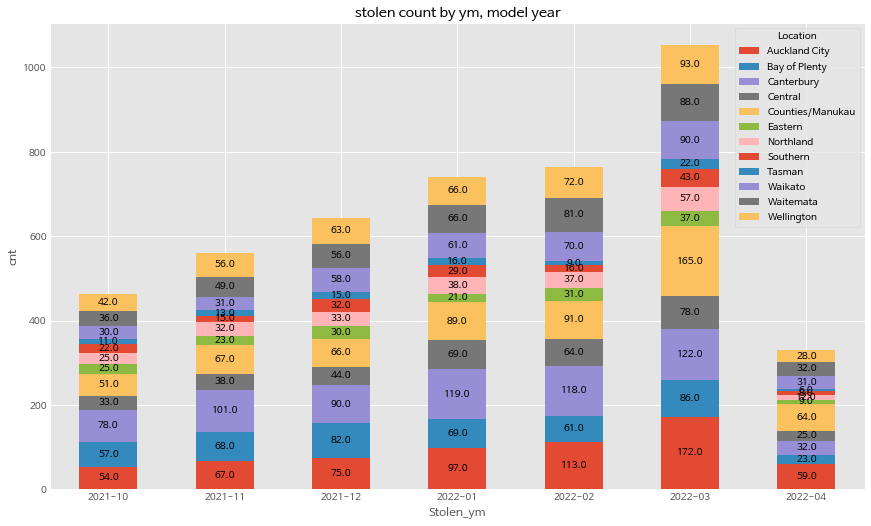

In [116]:
plt.style.use('ggplot')
ax = tmp.plot(kind='bar', rot=0, figsize=(13,8)
                       , title='stolen count by ym, model year', stacked=True)
ax.set_ylabel('cnt')

for c in ax.containers:
  labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
  ax.bar_label(c, labels=labels, label_type='center')

In [117]:
loc_df = pd.DataFrame(df.loc[df['Stolen_ym'] == '2022-03'].groupby('Location').cnt.sum()).reset_index()
loc_df.head()

,Location,cnt
0,Auckland City,172
1,Bay of Plenty,86
2,Canterbury,122
3,Central,78
4,Counties/Manukau,165


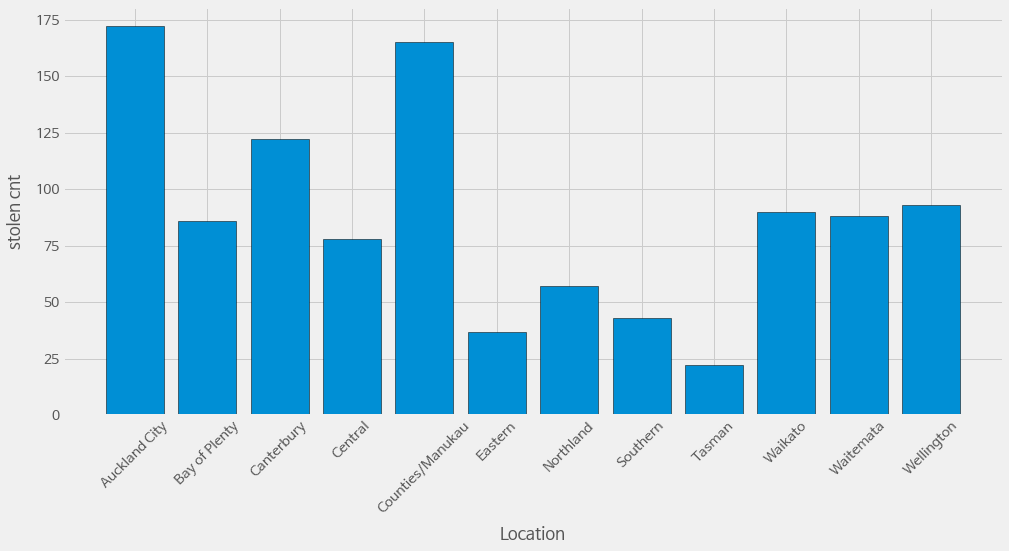

In [118]:
plt.style.use('fivethirtyeight')

plt.figure(figsize=(15,7))
plt.bar(loc_df['Location'], loc_df['cnt'], width=0.8, edgecolor='black')

plt.xlabel('Location', labelpad=10)
plt.ylabel('stolen cnt', labelpad=10)

plt.xticks(rotation=45)

plt.show()

In [120]:
loc_tmp_df = pd.DataFrame(df.groupby(['Location', 'DateStolen']).cnt.sum()).reset_index()
loc_tmp_df.head()

,Location,DateStolen,cnt
0,Auckland City,2021-10-07,1
1,Auckland City,2021-10-08,5
2,Auckland City,2021-10-10,3
3,Auckland City,2021-10-11,1
4,Auckland City,2021-10-12,3


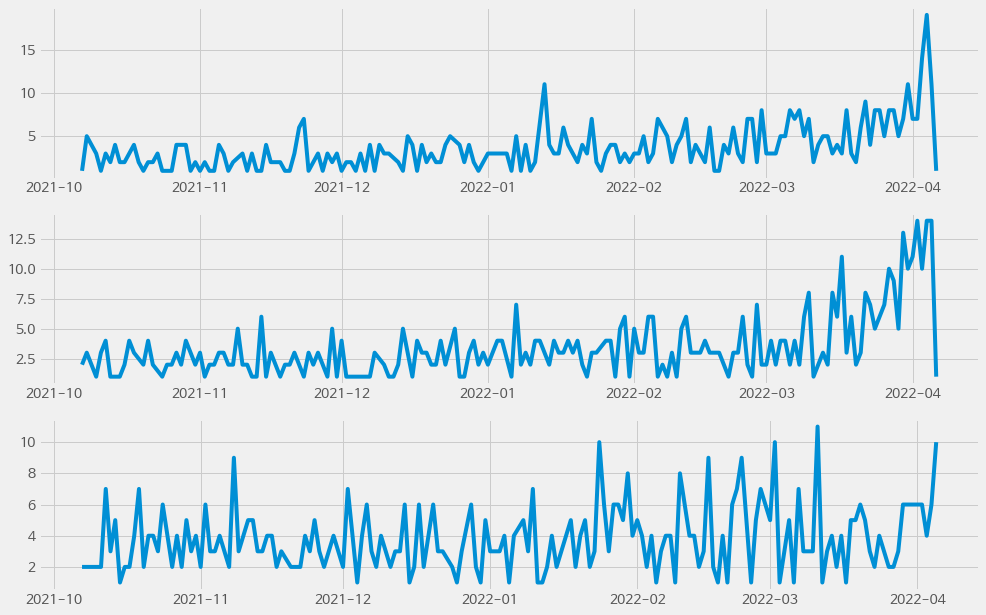

In [121]:
plt.figure(figsize=(15, 10))

plt.subplot(311)
plt.plot(loc_tmp_df[loc_tmp_df['Location'] == 'Auckland City']['DateStolen'], loc_tmp_df[loc_tmp_df['Location'] == 'Auckland City']['cnt'])

plt.subplot(312)
plt.plot(loc_tmp_df[loc_tmp_df['Location'] == 'Counties/Manukau']['DateStolen'], loc_tmp_df[loc_tmp_df['Location'] == 'Counties/Manukau']['cnt'])

plt.subplot(313)
plt.plot(loc_tmp_df[loc_tmp_df['Location'] == 'Canterbury']['DateStolen'], loc_tmp_df[loc_tmp_df['Location'] == 'Canterbury']['cnt'])

plt.show()

In [122]:
df.loc[df['Location'] == 'Auckland City']

,Color,VehicleModel,VehicleDesc,ModelYear,VehicleType,DateStolen,Location,Stolen_ym,ModelYear_type,cnt
2,Silver,Trailer,ASD JETSKI,2021,Boat Trailer,2022-02-13,Auckland City,2022-02,f. 2020년~2022년,1
12,Black,Vespa,ET2,2004,Moped,2021-12-19,Auckland City,2021-12,b. 2000년~2004년,1
13,Blue,Honda,TODAY,2007,Moped,2022-01-23,Auckland City,2022-01,c. 2005년~2010년,1
16,Silver,Trailer,BSTB85B,2021,Trailer,2021-10-10,Auckland City,2021-10,f. 2020년~2022년,1
29,Silver,Trailer,PRO COMMERCIAL,2018,Trailer,2021-12-21,Auckland City,2021-12,e. 2015년~2019년,1
...,...,...,...,...,...,...,...,...,...,...
4484,Red,Toyota,SURF,1989,Stationwagon,2022-02-14,Auckland City,2022-02,a. 2000년 이전,1
4493,White,Ford,TRADER,1993,Other Truck,2022-03-06,Auckland City,2022-03,a. 2000년 이전,1
4509,Green,Nissan,PULSAR,2000,Hatchback,2022-03-26,Auckland City,2022-03,b. 2000년~2004년,1
4518,White,Isuzu,BIGHORN,1997,Stationwagon,2022-04-04,Auckland City,2022-04,a. 2000년 이전,1


In [124]:
df.loc[df['Location'] == 'Auckland City'].pivot_table(columns='ModelYear_type', index='Color', values='cnt', aggfunc='sum')

ModelYear_type,a. 2000년 이전,b. 2000년~2004년,c. 2005년~2010년,d. 2010년~2014년,e. 2015년~2019년,f. 2020년~2022년,데이터 없음
Color,,,,,,,
Black,7.0,10.0,29.0,15.0,33.0,21.0,NaN
Blue,14.0,14.0,23.0,8.0,7.0,4.0,NaN
Brown,NaN,NaN,2.0,NaN,1.0,3.0,NaN
Cream,NaN,NaN,NaN,1.0,NaN,NaN,NaN
Gold,2.0,3.0,4.0,NaN,NaN,NaN,NaN
Green,6.0,6.0,4.0,1.0,2.0,NaN,NaN
Grey,4.0,11.0,14.0,7.0,7.0,4.0,NaN
Orange,NaN,2.0,1.0,1.0,2.0,2.0,NaN
Pink,NaN,1.0,NaN,NaN,NaN,NaN,NaN


In [125]:
auckland_df = df.loc[df['Location'] == 'Auckland City'].pivot_table(columns='ModelYear_type', index='Color', values='cnt', aggfunc='sum').fillna(0).astype(int)
auckland_df

ModelYear_type,a. 2000년 이전,b. 2000년~2004년,c. 2005년~2010년,d. 2010년~2014년,e. 2015년~2019년,f. 2020년~2022년,데이터 없음
Color,,,,,,,
Black,7,10,29,15,33,21,0
Blue,14,14,23,8,7,4,0
Brown,0,0,2,0,1,3,0
Cream,0,0,0,1,0,0,0
Gold,2,3,4,0,0,0,0
Green,6,6,4,1,2,0,0
Grey,4,11,14,7,7,4,0
Orange,0,2,1,1,2,2,0
Pink,0,1,0,0,0,0,0


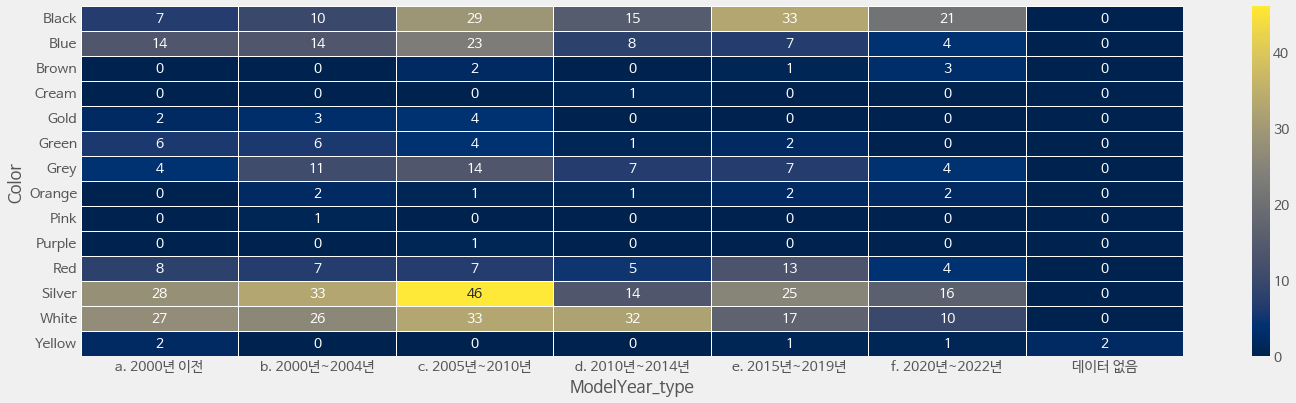

In [126]:
plt.figure(figsize=(22, 6))
ax = sns.heatmap(auckland_df, annot=True, fmt='d', linewidths = 1, cmap='cividis')

In [127]:
df.head()

,Color,VehicleModel,VehicleDesc,ModelYear,VehicleType,DateStolen,Location,Stolen_ym,ModelYear_type,cnt
0,Silver,Trailer,BST2021D,2021,Trailer,2021-11-05,Waitemata,2021-11,f. 2020년~2022년,1
1,Silver,Trailer,OUTBACK BOATS FT470,2021,Boat Trailer,2021-12-13,Eastern,2021-12,f. 2020년~2022년,1
2,Silver,Trailer,ASD JETSKI,2021,Boat Trailer,2022-02-13,Auckland City,2022-02,f. 2020년~2022년,1
3,Silver,Trailer,MSC 7X4,2021,Trailer,2021-11-13,Central,2021-11,f. 2020년~2022년,1
4,Silver,Trailer,D-MAX 8X5,2018,Trailer,2022-01-10,Waitemata,2022-01,e. 2015년~2019년,1


In [128]:
labelencoder = LabelEncoder()
corr_df = pd.DataFrame()

for column in df.columns:
    corr_df[column] = labelencoder.fit_transform(df[column])

In [129]:
corr_df.head()

,Color,VehicleModel,VehicleDesc,ModelYear,VehicleType,DateStolen,Location,Stolen_ym,ModelYear_type,cnt
0,11,122,213,62,22,29,10,1,5,0
1,11,122,822,62,2,67,5,2,5,0
2,11,122,148,62,2,129,0,4,5,0
3,11,122,776,62,22,37,3,1,5,0
4,11,122,356,59,22,95,10,3,4,0


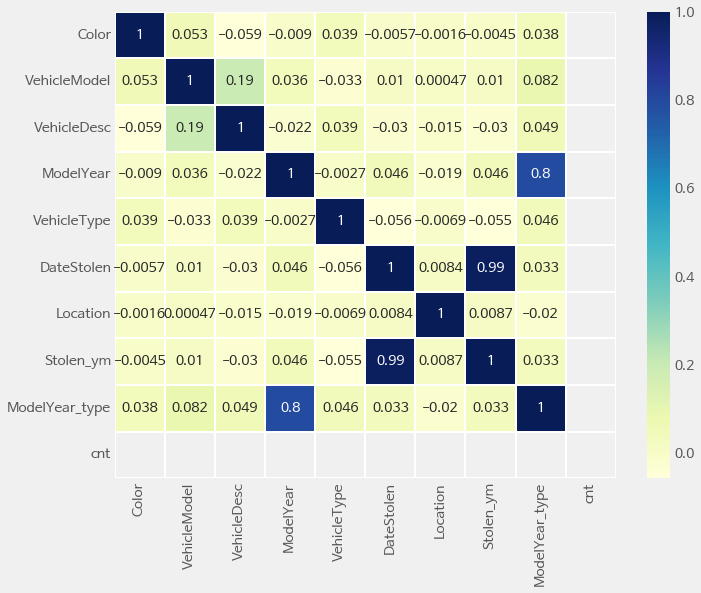

In [130]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_df.corr(), linewidths=.1, cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

In [131]:
labelencoder = LabelEncoder()
march_corr_df = pd.DataFrame()

march_df = df.loc[df['Stolen_ym'] == '2022-03']

for column in df.columns:
    march_corr_df[column] = labelencoder.fit_transform(march_df[column])

march_corr_df.head()

,Color,VehicleModel,VehicleDesc,ModelYear,VehicleType,DateStolen,Location,Stolen_ym,ModelYear_type,cnt
0,10,62,144,42,14,3,3,0,4,0
1,10,62,398,46,14,1,3,0,5,0
2,10,12,393,46,14,1,0,0,5,0
3,1,71,433,20,10,20,8,0,0,0
4,12,62,73,25,15,4,4,0,1,0


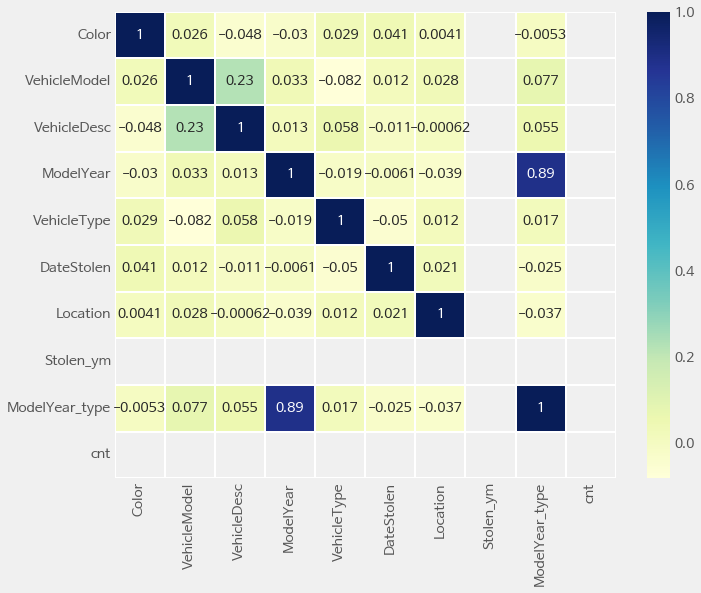

In [132]:
plt.figure(figsize=(10, 8))
sns.heatmap(march_corr_df.corr(), linewidths=.1, cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

In [133]:
labelencoder = LabelEncoder()
au_df = pd.DataFrame()

au_tmp_df = df.loc[(df['Stolen_ym'] == '2022-03') & (df['Location'] == 'Auckland City')]

for column in df.columns:
    au_df[column] = labelencoder.fit_transform(au_tmp_df[column])

au_df.head()

,Color,VehicleModel,VehicleDesc,ModelYear,VehicleType,DateStolen,Location,Stolen_ym,ModelYear_type,cnt
0,8,6,100,32,10,1,0,0,5,0
1,0,33,51,32,10,5,0,0,5,0
2,10,33,63,2,10,20,0,0,0,0
3,8,13,100,7,10,23,0,0,0,0
4,8,33,26,29,10,17,0,0,4,0


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


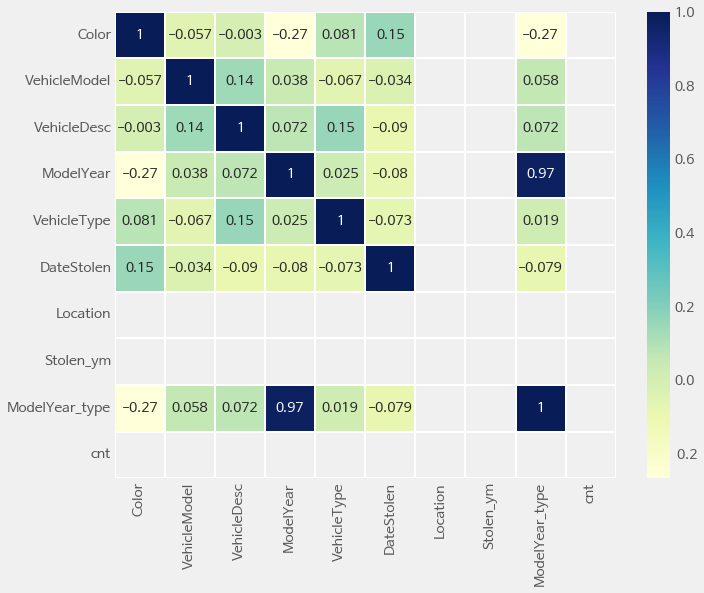

In [134]:
plt.figure(figsize=(10, 8))
sns.heatmap(au_df.corr(), linewidths=.1, cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);